##### Python for High School (Winter 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_Matrix_Math.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_Matrix_Math.ipynb)

# Matrix Math

Let's start with notation, and with what we do in Markdown, with our Jupyter Notebooks.  

When wanting to typeset mathematics in Jupyter, we use $\LaTeX$.

Like this:

$$
\frac{d}{dx}\sin{x}=\cos{x}
$$

Or like this:

A matrix is a notational device, an artifact in typesetting one could say, a rectangular arrangement that we generalize to more and more axes within the underlying theory (the algebra).  

A matrix is also an operational object, encoded in Python, versus typeset.

We might do matrix operations with the following packages: 

* [numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg)
* [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) 

in Python.

In [1]:
import numpy as np
import scipy.linalg as sp_la

In [2]:
np.linalg

<module 'numpy.linalg' from '/Users/kirbyurner/opt/anaconda3/lib/python3.9/site-packages/numpy/linalg/__init__.py'>

In [3]:
sp_la

<module 'scipy.linalg' from '/Users/kirbyurner/opt/anaconda3/lib/python3.9/site-packages/scipy/linalg/__init__.py'>

Let's say we're especially keen to use the symbols from the quantum mechanics literature, such as the little dagger symbol next to a matrix.  [Where did that come from?](https://hsm.stackexchange.com/questions/11426/who-introduced-the-daggersymbol-as-conjugate-transpose-in-quantum-mechanics)

It represents ["cojugate transpose of"](https://en.wikipedia.org/wiki/Conjugate_transpose), meaning the matrix is transposed, then each term is replaced with its complex conjugate.

In [4]:
c = 1 + 2j
c

(1+2j)

In [5]:
c.conjugate()

(1-2j)

In [6]:
d = 3 - 5j

In [7]:
matrix = np.array([c, d, d, c]).reshape(2,2)
matrix

array([[1.+2.j, 3.-5.j],
       [3.-5.j, 1.+2.j]])

In [8]:
matrix.conjugate()

array([[1.-2.j, 3.+5.j],
       [3.+5.j, 1.-2.j]])

In [9]:
matrix.T.conjugate()

array([[1.-2.j, 3.+5.j],
       [3.+5.j, 1.-2.j]])

In [10]:
matrix.conjugate().T

array([[1.-2.j, 3.+5.j],
       [3.+5.j, 1.-2.j]])

From the [Wikipedia example](https://en.wikipedia.org/wiki/Conjugate_transpose#Example):

$$
\boldsymbol{A} = \begin{bmatrix} 1 & -2 - i & 5 \\ 1 + i & i & 4-2i \end{bmatrix}
$$

$$
\boldsymbol{A}^\mathsf{T} = \begin{bmatrix} 1 & 1 + i \\ -2 - i & i \\ 5 & 4-2i\end{bmatrix}
$$

$$
\boldsymbol{A}^\mathrm{H} = \begin{bmatrix} 1 & 1 - i \\ -2 + i & -i \\ 5 & 4+2i\end{bmatrix}
$$

In [11]:
A = np.array([[1, -2-1j, 5], [1+1j, 1j, 4-2j]], dtype=complex)
A

array([[ 1.+0.j, -2.-1.j,  5.+0.j],
       [ 1.+1.j,  0.+1.j,  4.-2.j]])

In [12]:
A.T

array([[ 1.+0.j,  1.+1.j],
       [-2.-1.j,  0.+1.j],
       [ 5.+0.j,  4.-2.j]])

In [13]:
A.T.conjugate()

array([[ 1.-0.j,  1.-1.j],
       [-2.+1.j,  0.-1.j],
       [ 5.-0.j,  4.+2.j]])

[Dr. Shouke Wei](https://medium.com/@shouke.wei) has done some excellent work online to distill $\LaTeX$'s abilities for us.  I'm not finding the dagger per se, but I've got what I need to make a matrix.

I'm drawing from his *Commonly Used Equations and Symbols with Latex in Jupyter Notebook* [on Medium](https://medium.com/@shouke.wei/commonly-used-equations-and-symbols-with-latex-in-jupyter-notebook-c5812ac15e90). If you have exhausted your quota on Medium, not to worry.  What you need is right here in this Notebook.

$$
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\
    \ldots &\ldots &\ldots &\ldots &\ldots \\
    x_{d1}       & x_{d2} & x_{d3} & \dots & x_{dn}
\end{bmatrix}
=
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}
$$

Adapting what we've learned above, let's go below:

$$
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\
    \ldots &\ldots &\ldots &\ldots &\ldots \\
    x_{d1}       & x_{d2} & x_{d3} & \dots & x_{dn}
\end{bmatrix}{\Large ^{\dagger}}
$$

That's pretty good right?  There's some playing with [font size](https://latex-tutorial.com/changing-font-size/).

And besides, we're usually fine representing an entire matrix with one letter, thusly:

$$
A^{\dagger}
$$

But what does it all mean:  the Hermitian adjoint and so on?

In [14]:
from IPython.display import YouTubeVideo

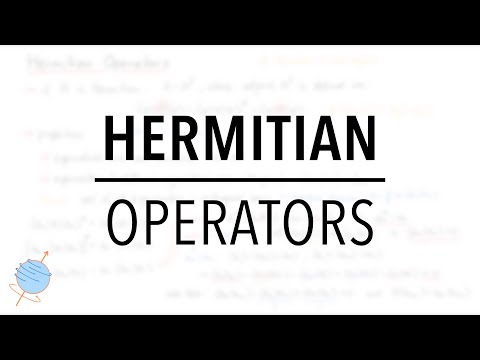

In [15]:
YouTubeVideo("t2z3Tinoi04")

We're going to need the eigen stuff, complex conjugates, the star operator...  more $\LaTeX$ and more operational objects, in other words.

$$
A^{\star}
$$

Is that the right star?

$$
A^{*}
$$

might be better.